# k-Nearest Neighbors

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
pg = pd.read_csv('https://raw.githubusercontent.com/yw110-1/INDE-577/main/Data/penguins.csv')
pg = pg.dropna()
pg = pg.drop(['island','sex'], axis=1)
pg.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0


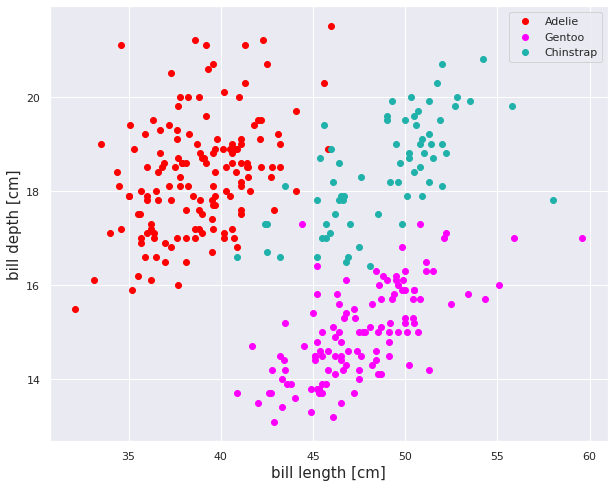

In [10]:
# Plot the data
species = ["Adelie","Gentoo", "Chinstrap"]
colors = ["red", "magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(species, colors):
    temp_df = pg[pg.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("bill length [cm]", fontsize = 15)
ax.set_ylabel("bill depth [cm]", fontsize = 15)
ax.legend()
plt.show()

## Build Training Sets

In [12]:
from sklearn.model_selection import train_test_split

X = pg[["bill_length_mm","bill_depth_mm"]].to_numpy()

y = pg["species"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

## Distance Measure

In [13]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between point 10 and 67 is {distance(X[10], X[67])}")

The distance between point 10 and 67 is 9.265527507918797


With our distance function, we are now ready to write a function to compute the  𝑘 -nearest neighbors to a given point.

In [14]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [15]:
# Test the k_nearest_neighbors function
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([46.8, 15.4]), 'Gentoo', 0.14142135623730523],
 [array([46.4, 15.6]), 'Gentoo', 0.4242640687119308],
 [array([46.4, 15. ]), 'Gentoo', 0.42426406871193206],
 [array([47.2, 15.5]), 'Gentoo', 0.5385164807134502],
 [array([46.5, 14.8]), 'Gentoo', 0.5385164807134515]]

In [18]:
# Show the true label 
y_test[-1]

'Gentoo'

## Predict Target Label

Now that we have a function to compute the  𝑘 -nearest neighbors to a point, we can now write a function to predict a target label. However, we should note that KNN can be used for both classification and regression machine learning.

In [19]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count) #counts the labels
    
    else:
        return sum(x[1] for x in neighbors)/k

In [22]:
# Test our function 
KNN_Predict(X_test[-1], X_train, y_train, 5)

'Gentoo'

## Error Analysis

Next, we compute the classfication error.

In [23]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

In [24]:
# Test our function
classification_error(X_test, y_test, X_train, y_train, 7)

0.045454545454545456

## Choose the value of $k$

In [25]:
possible_k = [k for k in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

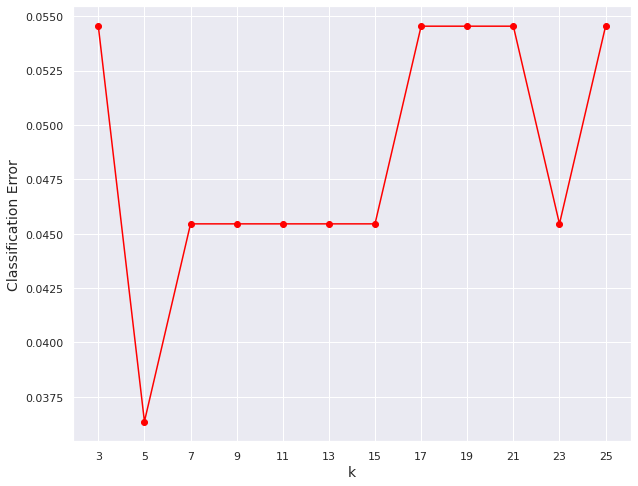

In [26]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()